# U.S. Medical Insurance Costs

In [1]:
import csv
import math
from tabulate import tabulate
import matplotlib.pyplot as plt

with open('insurance.csv') as ins_data:
  ins_dict = []
  for line in csv.DictReader(ins_data):
    ins_dict.append(line)

#test dictionary and find out how many datapoints there are
#print(ins_dict[:5])
total_datapoints = len(ins_dict)
print("There are a total of: {} datapoints.".format(total_datapoints))

There are a total of: 1338 datapoints.


### Find the oldest person, youngest person, and average age of the people represented in the data.

In [2]:
total_ages = 0
max_age = 0
min_age = 200
ages = []
for item in ins_dict:
  total_ages += int(item['age'])
  ages.append(int(item['age']))
for x in ages:
    if max_age <= x:
        max_age = x
    elif x < min_age:
        min_age = x

#groupA = under 20 years old, groupB = 20-25 years old, groupC = 26-30 years old, groupD = 31-35 years old, groupE = 36-40 years old, groupF = 41-45 years old, groupG = 46-50 years old, groupH = 51-55 years old, groupI = 56-60 years old, groupJ = 61-65 years old
groupA = 0
groupB = 0
groupC = 0
groupD = 0
groupE = 0
groupF = 0
groupG = 0
groupH = 0
groupI = 0
groupJ = 0

for x in ages:
    if x < 20:
        groupA += 1
    elif x >= 20 and x <= 25:
        groupB += 1
    elif x >= 26 and x <= 30:
        groupC += 1
    elif x >= 31 and x <= 35:
        groupD += 1
    elif x >= 36 and x <= 40:
        groupE += 1
    elif x >= 41 and x <= 45:
        groupF += 1
    elif x >= 46 and x <= 50:
        groupG += 1
    elif x >= 51 and x <= 55:
        groupH += 1
    elif x >= 56 and x <= 60:
        groupI += 1
    elif x >= 61:
        groupJ += 1
avg_age = total_ages/total_datapoints
age_data = [['Age Group', 'Number in Group'], ['Under 20', groupA], ['20 - 25', groupB], ['26 - 30', groupC], ['31 - 35', groupD], ['36 - 40', groupE], ['41 - 45', groupF], ['46 - 50', groupG], ['51 - 55', groupH], ['56 - 60', groupI], ['61 - 65', groupJ]]

### How many are female? How many are male? What is the average cost of insurance for females and males? What is the difference in average cost? 

In [3]:
def sex_totals():
    females = 0
    males = 0

    for item in ins_dict:
        if item['sex'] == 'female':   
          females += 1
        elif item['sex'] == 'male':
          males += 1
    return females, males

female_cost = 0
male_cost = 0
for item in ins_dict:
    if item['sex'] == 'female':
        female_cost += float(item['charges'])
    elif item['sex'] == 'male':
        male_cost += float(item['charges'])

avg_fcost = "${:2.2f}".format(female_cost/sex_totals()[0])
avg_mcost = "${:2.2f}".format(male_cost/sex_totals()[1])
avg_cost_diff = "${:2.2f}".format(abs(female_cost/sex_totals()[0] - male_cost/sex_totals()[1]))

### Represent the number of children in a table. What is the average cost of insurance depending on the number of kids a person has? 

In [4]:
def num_kids():
    no_children = 0
    one_child = 0
    two_children = 0
    more_than_two = 0
    for item in ins_dict:
        if item['children'] == '0':
            no_children += 1
        elif item['children'] == '1':
            one_child += 1
        elif item['children'] == '2':
            two_children += 1
        else:
            more_than_two += 1
    return no_children, one_child, two_children, more_than_two

kid_data = [['Number of Children', ' '], ['No children', num_kids()[0]], ['1 child', num_kids()[1]], ['2 children', num_kids()[2]], ['> 2 children:', num_kids()[3]]]

In [5]:
def kids_cost():
    none = 0
    one = 0
    two = 0
    g_two = 0
    for item in ins_dict:
        if item['children'] == '0':
            none += float(item['charges'])
        elif item['children'] == '1':
            one += float(item['charges'])
        elif item['children'] == '2':
            two += float(item['charges'])
        else:
            g_two += float(item['charges'])
    return none, one, two, g_two

def avg_kid_cost(num_kids, cost_kid):
    avg_cost_kids = "${:2.2f}".format(cost_kid/num_kids)
    return avg_cost_kids

no_kids = avg_kid_cost(num_kids()[0], kids_cost()[0])
one_kid = avg_kid_cost(num_kids()[1], kids_cost()[1])
two_kids = avg_kid_cost(num_kids()[2], kids_cost()[2])
g_two = avg_kid_cost(num_kids()[3], kids_cost()[3])
avg_cost_per_kids = {}
avg_cost_per_kids['None'] = no_kids
avg_cost_per_kids.update({'1 child': one_kid, '2 children': two_kids, '3 or more children': g_two})

### Represent the number of people in each BMI category in a table. Use the bmi chart from the CDC/WHO as reference.

#### How is BMI interpreted for adults?
For adults **20 years old and older**, BMI is interpreted using standard weight status categories. These categories are the same for men and women of all body types and ages.

The standard weight status categories associated with BMI ranges for adults are shown in the following table.

![bmi_image](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQA_eU-aRHhm4FgZnfAsS95FvBibw5spycIzg&usqp=CAU)

In [6]:
total_bmis = 0
max_bmi = 0
min_bmi = 200
bmis_under20 = []
bmis_over20 = []
bmi_costs = {}
under = 0
norm = 0
over = 0
obesity = 0
ob_1 = 0
ob_2 = 0
ob_3 = 0
n_underweight = 0
n_normal = 0
n_overweight = 0
n_obese = 0
n_ob1 = 0
n_ob2 = 0
n_ob3 = 0
for item in ins_dict:
  total_bmis += float(item['bmi'])
for item in ins_dict:  
  if int(item['age']) < 20:
    bmis_under20.append(float(item['bmi']))
  elif int(item['age']) >= 20:
    bmis_over20.append(float(item['bmi']))
for item in ins_dict:
  if int(item['age']) >= 20:
    bmi_costs[item['bmi']] = item['charges']
for item in ins_dict:  
  if int(item['age']) >= 20 and float(item['bmi']) < 18.5:
        under += float(item['charges'])
  elif int(item['age']) >= 20 and float(item['bmi']) >= 18.5 and float(item['bmi']) <= 24.9:
        norm += float(item['charges'])
  elif int(item['age']) >= 20 and float(item['bmi']) > 24.9 and float(item['bmi']) <= 29.9:
        over += float(item['charges'])
  elif int(item['age']) >= 20 and float(item['bmi']) > 29.9 and float(item['bmi']) <= 34.9:
        ob_1 += float(item['charges'])
  elif int(item['age']) >= 20 and float(item['bmi']) > 34.9 and float(item['bmi']) <= 39.9:
        ob_2 += float(item['charges'])
  elif int(item['age']) >= 20 and float(item['bmi']) > 39.9:
        ob_3 += float(item['charges'])      
for x in bmis_over20:
    if max_bmi <= x:
        max_bmi = x
    elif x < min_bmi:
        min_bmi = x
for x in bmis_over20:    
    if x < 18.5:
        n_underweight += 1
    elif x >= 18.5 and x <= 24.9:
        n_normal += 1
    elif x > 24.9 and x <= 29.9:
        n_overweight += 1
    elif x > 29.9 and x <= 34.9:
        n_ob1 += 1
    elif x > 34.9 and x <= 39.9:
        n_ob2 += 1
    elif x > 39.9:
        n_ob3 += 1
total_over20 = 0
for x in bmis_over20:
    total_over20 += x
avg_bmi = "{:2.2f}".format(total_over20/(total_datapoints - groupA))
avg_un = "${:2.2f}".format(under/n_underweight)
avg_norm = "${:2.2f}".format(norm/n_normal)
avg_over = "${:2.2f}".format(over/n_overweight)
avg_ob1 = "${:2.2f}".format(ob_1/n_ob1)
avg_ob2 = "${:2.2f}".format(ob_2/n_ob2)
avg_ob3 = "${:2.2f}".format(ob_3/n_ob3)

bmi_data = [['Weight Status', 'Number in Status', 'Average Cost'], ['Underweight', n_underweight, avg_un], ['Normal(Healthy)', n_normal, avg_norm], ['Overweight', n_overweight, avg_over], ['Obese: class 1', n_ob1, avg_ob1], ['Obese: class 2', n_ob2, avg_ob2], ['Obese: class 3', n_ob3, avg_ob3]]

In [7]:
#print('Obese individuals could save an estimated average of {} per year, if they adopt a healthier lifestyle and lose weight.'.format('${:2.2f}'.format((obesity/n_obese) - (norm/n_normal))))
#print('Overweight individuals could save an estimated average of {} per year, if they adopt a healthier lifestyle and lose weight.'.format('${:2.2f}'.format((over/n_overweight) - (norm/n_normal))))

## Analyze smoker status and find the difference in average cost between them.

In [8]:
ttl_smokers = 0
ttl_nonsmokers = 0
total_cost_s = 0
total_cost_ns = 0
for item in ins_dict:
    if item['smoker'] == 'yes':
        ttl_smokers += 1
        total_cost_s += float(item['charges'])
    elif item['smoker'] == 'no':
        ttl_nonsmokers += 1
        total_cost_ns += float(item['charges'])
avg_smk = total_cost_s/ttl_smokers
avg_NS = total_cost_ns/ttl_nonsmokers
diff_smk = '${:2.2f}'.format(abs(avg_smk - avg_NS))
smoker_data = [['Total Smokers', 'Total Non-smokers', 'Average Cost for Smokers', 'Average Cost for Non-Smokers', 'Difference in Average Cost'], [ttl_smokers, ttl_nonsmokers, '${:2.2f}'.format(avg_smk), '${:2.2f}'.format(avg_NS), diff_smk]]

## Figure out the number of datapoints in each region. How many smokers in each region? Average cost of insurance per region? Healthiest region based on greater number of healthy range BMI scores? Region by age?

In [9]:
def regions():
    regions = {}
    count1 = 0
    count2 = 0
    count3 = 0
    count4 = 0
    for item in ins_dict:
        if item['region'] == 'southwest':
            count1 += 1
        elif item['region'] == 'southeast':
            count2 += 1            
        elif item['region'] == 'northwest':
            count3 += 1            
        elif item['region'] == 'northeast':
            count4 += 1
    regions['southwest'] = [count1, "{:2.2f}%".format(count1/total_datapoints*100)]
    regions['southeast'] = [count2, "{:2.2f}%".format(count2/total_datapoints*100)]
    regions['northwest'] = [count3, "{:2.2f}%".format(count3/total_datapoints*100)]
    regions['northeast'] = [count4, "{:2.2f}%".format(count4/total_datapoints*100)]
    return [[regions], count1, count2, count3, count4]

In [10]:
SW_total = regions()[1]
SE_total = regions()[2]
NW_total = regions()[3]
NE_total = regions()[4]

SW_s = 0
SE_s = 0
NW_s = 0
NE_s = 0

SW_ns = 0
SE_ns = 0
NW_ns = 0
NE_ns = 0

SW_hlthy = 0
SE_hlthy = 0
NW_hlthy = 0
NE_hlthy = 0

SW_un = 0
SE_un = 0
NW_un = 0
NE_un = 0


for item in ins_dict:
  if item['region'] == 'southwest' and float(item['bmi']) <= 24.9:
    SW_hlthy += 1
  elif item['region'] == 'southeast' and float(item['bmi']) <= 24.9:
    SE_hlthy += 1
  elif item['region'] == 'northwest' and float(item['bmi']) <= 24.9:
    NW_hlthy += 1
  elif item['region'] == 'northeast' and float(item['bmi']) <= 24.9:
    NE_hlthy += 1
  elif float(item['bmi']) >= 25.0 and item['region'] == 'southwest':
    SW_un += 1
  elif float(item['bmi']) >= 25.0 and item['region'] == 'southeast':
    SE_un += 1
  elif float(item['bmi']) >= 25.0 and item['region'] == 'northwest':
    NW_un += 1
  elif float(item['bmi']) >= 25.0 and item['region'] == 'northeast':
    NE_un += 1

for item in ins_dict:
  if item['smoker'] == 'yes' and item['region'] == 'southwest':
    SW_s += 1
  elif item['smoker'] == 'yes' and item['region'] == 'southeast':
    SE_s += 1
  elif item['smoker'] == 'yes' and item['region'] == 'northwest':
    NW_s += 1
  elif item['smoker'] == 'yes' and item['region'] == 'northeast':
    NE_s += 1
  elif item['smoker'] == 'no' and item['region'] == 'southwest':
    SW_ns += 1
  elif item['smoker'] == 'no' and item['region'] == 'southeast':
    SE_ns += 1
  elif item['smoker'] == 'no' and item['region'] == 'northwest':
    NW_ns += 1
  elif item['smoker'] == 'no' and item['region'] == 'northeast':
    NE_ns += 1
    
regional_totals = (SW_total, SE_total, NW_total, NE_total)    
regional_smokers = (SW_s, SE_s, NW_s, NE_s)
regional_healthy_bmi = (SW_hlthy, SE_hlthy, NW_hlthy, NE_hlthy)
regional_unhealthy_bmi = (SW_un, SE_un, NW_un, NE_un)
regional_nonsmokers = (SW_ns, SE_ns, NW_ns, NE_ns)

In [11]:
SW_ttl_age = 0
SE_ttl_age = 0
NW_ttl_age = 0
NE_ttl_age = 0

SW_cost = 0
SE_cost = 0
NW_cost = 0
NE_cost = 0

for item in ins_dict:
      if item['region'] == 'southwest':
        SW_ttl_age += float(item['age'])
      elif item['region'] == 'southeast':
        SE_ttl_age += float(item['age'])
      elif item['region'] == 'northwest':
        NW_ttl_age += float(item['age'])
      elif item['region'] == 'northeast':
        NE_ttl_age += float(item['age'])

for item in ins_dict:
      if item['region'] == 'southwest':
        SW_cost += float(item['charges'])
      elif item['region'] == 'southeast':
        SE_cost += float(item['charges'])
      elif item['region'] == 'northwest':
        NW_cost += float(item['charges'])
      elif item['region'] == 'northeast':
        NE_cost += float(item['charges'])

SW_avg_age = '{:2.2f}'.format(SW_ttl_age/SW_total)
SE_avg_age = '{:2.2f}'.format(SE_ttl_age/SE_total)
NW_avg_age = '{:2.2f}'.format(NW_ttl_age/NW_total)
NE_avg_age = '{:2.2f}'.format(NE_ttl_age/NE_total)
regional_avg_age = (SW_avg_age, SE_avg_age, NW_avg_age, NE_avg_age)

SW_avg_cost = '${:2.2f}'.format(SW_cost/SW_total)
SE_avg_cost = '${:2.2f}'.format(SE_cost/SE_total)
NW_avg_cost = '${:2.2f}'.format(NW_cost/NW_total)
NE_avg_cost = '${:2.2f}'.format(NE_cost/NE_total)
region_avg_cost = (SW_avg_cost, SE_avg_cost, NW_avg_cost, NE_avg_cost)
SW = ['Southwest', SW_total, SW_s, SW_ns, SW_hlthy, SW_un, SW_avg_age, SW_avg_cost]
SE = ['Southeast', SE_total, SE_s, SE_ns, SE_hlthy, SE_un, SE_avg_age, SE_avg_cost]
NW = ['Northwest', NW_total, NW_s, NW_ns, NW_hlthy, NW_un, NW_avg_age, NW_avg_cost]
NE = ['Northeast', NE_total, NE_s, NE_ns, NE_hlthy, NE_un, NE_avg_age, NE_avg_cost]

In [12]:
regional_data = [['Region', 'Total', 'Smokers', 'Non-smokers', '# Healthy BMI', '# Unhealthy BMI', 'Average Age', 'Average Cost'], SW, SE, NW, NE]

In [13]:
print('The average age represented in our dataset is: {} years old.'.format(round(avg_age, 1)))
print("The oldest age represented in our dataset is: {} years.".format(max_age))
print("The youngest age represented in our dataset is: {} years.".format(min_age))
print(tabulate(age_data, headers='firstrow', showindex='never', tablefmt='fancy_grid'))
print("")
print('There are {} females ({}%) represented in our dataset.\nThere are {} males ({}%) represented in our dataset.'.format(sex_totals()[0], round(sex_totals()[0]/total_datapoints*100, 2), sex_totals()[1], round(sex_totals()[1]/total_datapoints*100, 2)))
print("")
print("The average cost of insurance for a female is: {}".format(avg_fcost))
print("The average cost of insurance for a male is: {}".format(avg_mcost))
print("The difference in cost between females and males is: {}".format(avg_cost_diff))
print("")
print(tabulate(kid_data, headers='firstrow', showindex='never',  tablefmt='fancy_grid'))
print("")
print("The average cost of insurance based on offspring is: {}".format(avg_cost_per_kids))
print("")
print(tabulate(bmi_data, headers='firstrow', showindex='never',  tablefmt='fancy_grid'))
print("")
print("")
print(tabulate(smoker_data))
print('Smokers could save an average of ' + '\033[1m' + diff_smk + '\033[0m' + ' if they quit smoking!\nWow!')
print("")
print(tabulate(regional_data, headers='firstrow', showindex='never',  tablefmt='fancy_grid'))

The average age represented in our dataset is: 39.2 years old.
The oldest age represented in our dataset is: 64 years.
The youngest age represented in our dataset is: 18 years.
╒═════════════╤═══════════════════╕
│ Age Group   │   Number in Group │
╞═════════════╪═══════════════════╡
│ Under 20    │               137 │
├─────────────┼───────────────────┤
│ 20 - 25     │               169 │
├─────────────┼───────────────────┤
│ 26 - 30     │               138 │
├─────────────┼───────────────────┤
│ 31 - 35     │               130 │
├─────────────┼───────────────────┤
│ 36 - 40     │               127 │
├─────────────┼───────────────────┤
│ 41 - 45     │               137 │
├─────────────┼───────────────────┤
│ 46 - 50     │               144 │
├─────────────┼───────────────────┤
│ 51 - 55     │               140 │
├─────────────┼───────────────────┤
│ 56 - 60     │               125 │
├─────────────┼───────────────────┤
│ 61 - 65     │                91 │
╘═════════════╧════════════════

### Explore potential biases in data and scenarios based on different factors.
Some things to look at:
1. Compare all males & females: age range 30 - 50 years old, non-smokers, 2 children, and BMI in normal(healthy) range. What is the difference between the cost for males and the cost for females? Why is it different? Does region matter?
2. Compare males: age 30 - 50, smokers, 0 children, BMI in normal range to males: age 30 - 50, non-smokers, 0 children, BMI in overweight range. Is there a difference in cost? What if we compare obese instead of overweight males? Does region matter?
3. Analyze regional data. Is it skewed in any way? 
4. How does insurance cost change for females aged 30 - 50, BMI in normal range, non-smoker, when they have children? Why does having children matter?

In [14]:
#1. find all males & females between the ages of 30-50, non_smokers, 2 children, BMI normal
males_1 = []
females_1 = []
num1_data = []

for item in ins_dict:
    if int(item['age']) >= 30 and int(item['age']) <= 50 and item['smoker'] == 'no' and int(item['children']) == 2 and float(item['bmi']) >= 18.5 and float(item['bmi']) <= 24.9:
        num1_data.append(item)

for item in num1_data:
    if item['sex'] == 'female':
        females_1.append(item)
    elif item['sex'] == 'male':
        males_1.append(item)

mtotal_cost = 0
ftotal_cost = 0
for x in males_1:
    mtotal_cost += float(x['charges'])
for x in females_1:
    ftotal_cost += float(x['charges'])

m_avg = (mtotal_cost/len(males_1))
f_avg = (ftotal_cost/len(females_1))

print('The average cost of insurance for males in our group is: ${}'.format('{:2.2f}'.format(m_avg)))
print('The average cost of insurance for females in our gruop is: ${}'.format('{:2.2f}'.format(f_avg)))
print('Males are charged an average of ${} more than females when all other factors are the same.'.format('{:2.2f}'.format(m_avg - f_avg)))
cost_data1 = [['Avg. Cost: Males', '${:2.2f}'.format(m_avg)], ['Avg. Cost: Females', '${:2.2f}'.format(f_avg)], ['Difference', '${:2.2f}'.format(m_avg - f_avg)]]
print(tabulate(cost_data1, headers=' ', showindex='never', tablefmt='fancy_grid'))

The average cost of insurance for males in our group is: $9778.32
The average cost of insurance for females in our gruop is: $7750.72
Males are charged an average of $2027.60 more than females when all other factors are the same.
╒════════════════════╤══════════╕
│                    │          │
╞════════════════════╪══════════╡
│ Avg. Cost: Males   │ $9778.32 │
├────────────────────┼──────────┤
│ Avg. Cost: Females │ $7750.72 │
├────────────────────┼──────────┤
│ Difference         │ $2027.60 │
╘════════════════════╧══════════╛


In [15]:
#2. males 30 - 50, 0 children, different BMI categories, smoker/healthy BMI vs. non-smoker/unhealthy BMI
m2_norm_s = []
m2_over_ns = []
m2_ob1_ns = []
m2_ob2_ns = []
m2_ob3_ns = []

for item in ins_dict:
    if int(item['age']) >= 30 and int(item['age']) <= 50 and item['smoker'] == 'yes' and int(item['children']) == 0 and float(item['bmi']) >= 18.5 and float(item['bmi']) <= 24.9:
        m2_norm_s.append(item)
    elif int(item['age']) >= 30 and int(item['age']) <= 50 and item['smoker'] == 'no' and int(item['children']) == 0 and float(item['bmi']) > 24.9 and float(item['bmi']) <= 29.9:
        m2_over_ns.append(item)
    elif int(item['age']) >= 30 and int(item['age']) <= 50 and item['smoker'] == 'no' and int(item['children']) == 0 and float(item['bmi']) > 29.9 and float(item['bmi']) <= 34.9:
        m2_ob1_ns.append(item)
    elif int(item['age']) >= 30 and int(item['age']) <= 50 and item['smoker'] == 'no' and int(item['children']) == 0 and float(item['bmi']) > 34.9 and float(item['bmi']) <= 39.9:
        m2_ob2_ns.append(item)
    elif int(item['age']) >= 30 and int(item['age']) <= 50 and item['smoker'] == 'no' and int(item['children']) == 0 and float(item['bmi']) > 39.9:
        m2_ob3_ns.append(item)

norm_smk = 0
over_ns = 0
ob1_ns = 0
ob2_ns = 0
ob3_ns = 0
for x in m2_norm_s:
    norm_smk += float(x['charges'])
for x in m2_over_ns:
    over_ns += float(x['charges'])
for x in m2_ob1_ns:
    ob1_ns += float(x['charges'])
for x in m2_ob2_ns:
    ob2_ns += float(x['charges'])
for x in m2_ob3_ns:
    ob3_ns += float(x['charges'])

A = len(m2_norm_s)
B = len(m2_over_ns)
C = len(m2_ob1_ns)
D = len(m2_ob2_ns)
E = len(m2_ob3_ns)
a_avg = norm_smk/A
b_avg = over_ns/B
c_avg = ob1_ns/C
d_avg = ob2_ns/D
e_avg = ob3_ns/E

cost_data2 = [['BMI normal, Smoker', '${:2.2f}'.format(a_avg)], ['BMI overweight, Non-smoker', '${:2.2f}'.format(b_avg)], ['BMI obese: class 1, Non-smoker', '${:2.2f}'.format(c_avg)], ['BMI obese: class 2, Non-smoker', '${:2.2f}'.format(d_avg)], ['BMI obese: class 3, Non-smoker', '${:2.2f}'.format(e_avg)]]
print(tabulate(cost_data2, headers='', tablefmt='plain'))

BMI normal, Smoker              $20999.27
BMI overweight, Non-smoker      $7638.84
BMI obese: class 1, Non-smoker  $7116.46
BMI obese: class 2, Non-smoker  $8582.53
BMI obese: class 3, Non-smoker  $5922.05


In [16]:
print(tabulate(regional_data, headers='firstrow', showindex='never',  tablefmt='fancy_grid'))

╒═══════════╤═════════╤═══════════╤═══════════════╤═════════════════╤═══════════════════╤═══════════════╤════════════════╕
│ Region    │   Total │   Smokers │   Non-smokers │   # Healthy BMI │   # Unhealthy BMI │   Average Age │ Average Cost   │
╞═══════════╪═════════╪═══════════╪═══════════════╪═════════════════╪═══════════════════╪═══════════════╪════════════════╡
│ Southwest │     325 │        58 │           267 │              51 │               274 │         39.46 │ $12346.94      │
├───────────┼─────────┼───────────┼───────────────┼─────────────────┼───────────────────┼───────────────┼────────────────┤
│ Southeast │     364 │        91 │           273 │              40 │               323 │         38.94 │ $14735.41      │
├───────────┼─────────┼───────────┼───────────────┼─────────────────┼───────────────────┼───────────────┼────────────────┤
│ Northwest │     325 │        58 │           267 │              69 │               255 │         39.2  │ $12417.58      │
├───────────┼───

3. Regional data doesn't appear to be skewed when looking at the averages from the table printed above. The Southeast region has more smokers overall and the most individuals with unhealthy BMI. Let's see if the percentages of smokers and unhealthy BMI are similar compared to total individuals.

In [17]:
print(regional_smokers)
print(regional_unhealthy_bmi)
print(regional_totals)

(58, 91, 58, 67)
(274, 323, 255, 241)
(325, 364, 325, 324)


In [18]:
smoker_pct = ['% Smokers by region']
bmi_pct = ['% Unhealthy BMI by region']

smoker_pct.append('{:2.2f}%'.format(regional_smokers[0]/regional_totals[0]*100))
smoker_pct.append('{:2.2f}%'.format(regional_smokers[1]/regional_totals[1]*100))
smoker_pct.append('{:2.2f}%'.format(regional_smokers[2]/regional_totals[2]*100))
smoker_pct.append('{:2.2f}%'.format(regional_smokers[3]/regional_totals[3]*100))

bmi_pct.append('{:2.2f}%'.format(regional_unhealthy_bmi[0]/regional_totals[0]*100))
bmi_pct.append('{:2.2f}%'.format(regional_unhealthy_bmi[1]/regional_totals[1]*100))
bmi_pct.append('{:2.2f}%'.format(regional_unhealthy_bmi[2]/regional_totals[2]*100))
bmi_pct.append('{:2.2f}%'.format(regional_unhealthy_bmi[3]/regional_totals[3]*100))

data_pct3 = [['', 'Southwest', 'Southeast', 'Northwest', 'Northeast'], smoker_pct, bmi_pct]
print(tabulate(data_pct3, headers='firstrow', showindex='never', tablefmt='fancy_grid'))

╒═══════════════════════════╤═════════════╤═════════════╤═════════════╤═════════════╕
│                           │ Southwest   │ Southeast   │ Northwest   │ Northeast   │
╞═══════════════════════════╪═════════════╪═════════════╪═════════════╪═════════════╡
│ % Smokers by region       │ 17.85%      │ 25.00%      │ 17.85%      │ 20.68%      │
├───────────────────────────┼─────────────┼─────────────┼─────────────┼─────────────┤
│ % Unhealthy BMI by region │ 84.31%      │ 88.74%      │ 78.46%      │ 74.38%      │
╘═══════════════════════════╧═════════════╧═════════════╧═════════════╧═════════════╛


In our table above, we can see that the % of smokers and % of individuals with unhealthy BMI is higher in the Southeast region compared to other regions. This could be that the Southeast region has more unhealthy individuals. However, our dataset does not provide enough information to draw any conclusions based on region with certainty.

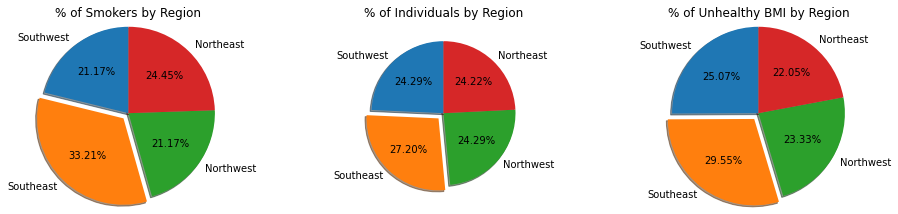

In [19]:
total_smokers = sum(regional_smokers)
data_pctlabels = ('Southwest', 'Southeast', 'Northwest', 'Northeast')
smoker_values = []
smoker_values.append(regional_smokers[0]/total_smokers*100)
smoker_values.append(regional_smokers[1]/total_smokers*100)
smoker_values.append(regional_smokers[2]/total_smokers*100)
smoker_values.append(regional_smokers[3]/total_smokers*100)

total_unhealthy_bmi = sum(regional_unhealthy_bmi)
unbmi_values = []
unbmi_values.append(regional_unhealthy_bmi[0]/total_unhealthy_bmi*100)
unbmi_values.append(regional_unhealthy_bmi[1]/total_unhealthy_bmi*100)
unbmi_values.append(regional_unhealthy_bmi[2]/total_unhealthy_bmi*100)
unbmi_values.append(regional_unhealthy_bmi[3]/total_unhealthy_bmi*100)

reg_total_pct = []
reg_total_pct.append(regional_totals[0]/total_datapoints*100)
reg_total_pct.append(regional_totals[1]/total_datapoints*100)
reg_total_pct.append(regional_totals[2]/total_datapoints*100)
reg_total_pct.append(regional_totals[3]/total_datapoints*100)

labels = data_pctlabels
values = smoker_values

labels2 = data_pctlabels
values2 = reg_total_pct

labels3 = data_pctlabels
values3 = unbmi_values

fig = plt.figure(figsize=(5, 5))
explode = (0, 0.1, 0, 0)
ax1 = fig.add_axes([0, 0, .5, .5], aspect=1)
ax1.pie(values, labels=labels, explode=explode, autopct='%2.2f%%', shadow=True, startangle=90, radius = 1.2)
ax2 = fig.add_axes([.875, 0, .5, .5], aspect=1)
ax2.pie(values2, labels=labels2, explode=explode, autopct='%2.2f%%', shadow=True, startangle=90, radius=1)
ax3 = fig.add_axes([1.75, .0, .5, .5], aspect=1)
ax3.pie(values3, labels=labels3, explode=explode, autopct = '%2.2f%%', shadow=True, startangle=90, radius = 1.2)

ax1.set_title('% of Smokers by Region')
ax2.set_title('% of Individuals by Region')
ax3.set_title('% of Unhealthy BMI by Region')

plt.show()

In [20]:
#4. How does insurance cost change for females aged 30 - 50, BMI in normal range, non-smoker, when they have children? Why does having children matter?
#Changed the parameters to include females in the 'overweight' BMI range instead. There was not enough data for females in the normal BMI range.

f_0kids = 0
f_1kid = 0
f_2kids = 0
f_3kids = 0
f_morekids = 0
cost_0 = []
cost_1 = []
cost_2 = []
cost_3 = []
cost_more = []

for item in ins_dict:
    if int(item['age']) >= 30 and int(item['age']) <= 50 and item['smoker'] == 'no' and float(item['bmi']) > 24.9 and float(item['bmi']) <= 29.9 and item['sex'] == 'female':
        if int(item['children']) == 0:
            f_0kids += 1
            cost_0.append(float(item['charges']))
        elif int(item['children']) == 1:
            f_1kid += 1
            cost_1.append(float(item['charges']))
        elif int(item['children']) == 2:
            f_2kids += 1
            cost_2.append(float(item['charges']))
        elif int(item['children']) == 3:
            f_3kids += 1
            cost_3.append(float(item['charges']))
        elif int(item['children']) > 3:
            f_morekids += 1
            cost_more.append(float(item['charges']))
t_cost0 = sum(cost_0)
t_cost1 = sum(cost_1)
t_cost2 = sum(cost_2)
t_cost3 = sum(cost_3)
t_costmore = sum(cost_more)
avg0_ow = t_cost0/f_0kids
avg1_ow = t_cost1/f_1kid
avg2_ow = t_cost2/f_2kids
avg3_ow = t_cost3/f_3kids
avgmore_ow = t_costmore/f_morekids

num_kids = (f_0kids, f_1kid, f_2kids, f_3kids, f_morekids)
ttl_charges = (sum(cost_0), sum(cost_1), sum(cost_2), sum(cost_3), sum(cost_more))
overweight_avg = (avg0_ow, avg1_ow, avg2_ow, avg3_ow, avgmore_ow)

In [21]:
#4a. Changing parameters again to include females in the 'obese: class 1' BMI range.
f_0kids_a = 0
f_1kid_a = 0
f_2kids_a = 0
f_3kids_a = 0
f_morekids_a = 0
cost_0_a = []
cost_1_a = []
cost_2_a = []
cost_3_a = []
cost_more_a = []

for item in ins_dict:
    if int(item['age']) >= 30 and int(item['age']) <= 50 and item['smoker'] == 'no' and float(item['bmi']) > 29.9 and float(item['bmi']) <= 34.9 and item['sex'] == 'female':
        if int(item['children']) == 0:
            f_0kids_a += 1
            cost_0_a.append(float(item['charges']))
        elif int(item['children']) == 1:
            f_1kid_a += 1
            cost_1_a.append(float(item['charges']))
        elif int(item['children']) == 2:
            f_2kids_a += 1
            cost_2_a.append(float(item['charges']))
        elif int(item['children']) == 3:
            f_3kids_a += 1
            cost_3_a.append(float(item['charges']))
        elif int(item['children']) > 3:
            f_morekids_a += 1
            cost_more_a.append(float(item['charges']))

t_cost0_a = sum(cost_0_a)
t_cost1_a = sum(cost_1_a)
t_cost2_a = sum(cost_2_a)
t_cost3_a = sum(cost_3_a)
t_costmore_a = sum(cost_more_a)
avg0_ob1 = t_cost0_a/f_0kids_a
avg1_ob1 = t_cost1_a/f_1kid_a
avg2_ob1 = t_cost2_a/f_2kids_a
avg3_ob1 = t_cost3_a/f_3kids_a
avgmore_ob1 = t_costmore_a/f_morekids_a

obese1_avg = (avg0_ob1, avg1_ob1, avg2_ob1, avg3_ob1, avgmore_ob1)
num_kids_a = (f_0kids_a, f_1kid_a, f_2kids_a, f_3kids_a, f_morekids_a)
ttl_charges_a = (sum(cost_0_a), sum(cost_1_a), sum(cost_2_a), sum(cost_3_a), sum(cost_more_a))


In [22]:
#4b. Changing parameters again to include females in the 'obese: class 2' BMI range.
f_0kids_b = 0
f_1kid_b = 0
f_2kids_b = 0
f_3kids_b = 0
f_morekids_b = 0
cost_0_b = []
cost_1_b = []
cost_2_b = []
cost_3_b = []
cost_more_b = []

for item in ins_dict:
    if int(item['age']) >= 30 and int(item['age']) <= 50 and item['smoker'] == 'no' and float(item['bmi']) > 34.9 and float(item['bmi']) <= 39.9 and item['sex'] == 'female':
        if int(item['children']) == 0:
            f_0kids_b += 1
            cost_0_b.append(float(item['charges']))
        elif int(item['children']) == 1:
            f_1kid_b += 1
            cost_1_b.append(float(item['charges']))
        elif int(item['children']) == 2:
            f_2kids_b += 1
            cost_2_b.append(float(item['charges']))
        elif int(item['children']) == 3:
            f_3kids_b += 1
            cost_3_b.append(float(item['charges']))
        elif int(item['children']) > 3:
            f_morekids_b += 1
            cost_more_b.append(float(item['charges']))

t_cost0_b = sum(cost_0_b)
t_cost1_b = sum(cost_1_b)
t_cost2_b = sum(cost_2_b)
t_cost3_b = sum(cost_3_b)
t_costmore_b = sum(cost_more_b)
avg0_ob2 = t_cost0_b/f_0kids_b
avg1_ob2 = t_cost1_b/f_1kid_b
avg2_ob2 = t_cost2_b/f_2kids_b
avg3_ob2 = t_cost3_b/f_3kids_b
avgmore_ob2 = 0

obese2_avg = (avg0_ob2, avg1_ob2, avg2_ob2, avg3_ob2, avgmore_ob2)
            
num_kids_b = (f_0kids_b, f_1kid_b, f_2kids_b, f_3kids_b, f_morekids_b)
ttl_charges_b = (sum(cost_0_b), sum(cost_1_b), sum(cost_2_b), sum(cost_3_b), sum(cost_more_b))

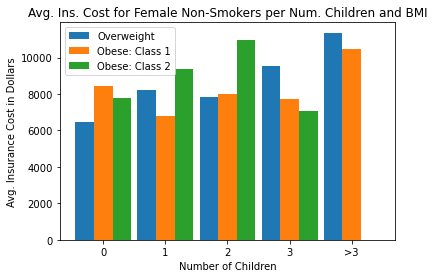

In [23]:
w=0.3

x = [0, 1, 2, 3, '>3']
overweight = overweight_avg
obese_1 = obese1_avg
obese_2 = obese2_avg
bar1 = [0, 1, 2, 3, 4]
plt.bar(bar1, overweight, w, label='Overweight')
bar2 = [i+w for i in bar1]
plt.bar(bar2, obese_1, w, label='Obese: Class 1')
bar3 = [i+w for i in bar2]
plt.bar(bar3, obese_2, w, label='Obese: Class 2')
plt.xlabel('Number of Children')
plt.ylabel('Avg. Insurance Cost in Dollars')
plt.title('Avg. Ins. Cost for Female Non-Smokers per Num. Children and BMI')
plt.xticks(bar2, x)
plt.rcParams["figure.figsize"] = (10,6)
plt.legend()
plt.show()

Looking at the graph of insurance cost when compared to number of children and BMI, some things don't make sense. Why does a person in the overweight range for BMI and with more than 3 children get charged more, on average, than a person who is in the Obese: CLass 2 BMI range with the same number of children? It doesn't seem fair!